# Supernova distances and redshift 2

In [1]:
import numpy as np
import pylab as plt
from matplotlib import pyplot as plt

(35.0, 50.0)

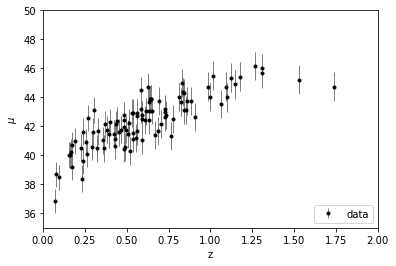

In [2]:
from astroML.datasets import generate_mu_z
z_sample, mu_sample, dmu = generate_mu_z(100, random_state=1234)

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50)

## GPR fit

In [3]:
from sklearn.gaussian_process import GaussianProcessRegressor, kernels
from scipy.optimize import fmin_cobyla

In [28]:
z_grid = np.linspace(0,2,1000)
gp = GaussianProcessRegressor(alpha = dmu^2 ) ### No gli errori forse non vanno qui come dice gerosa
gp.fit(z_sample[:, np.newaxis],mu_sample)
mu_pred, dmu_pred = gp.predict(z_grid[:, np.newaxis],return_std=True)
#print(y_pred, dy_pred)

TypeError: ufunc 'bitwise_xor' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

(35.0, 50.0)

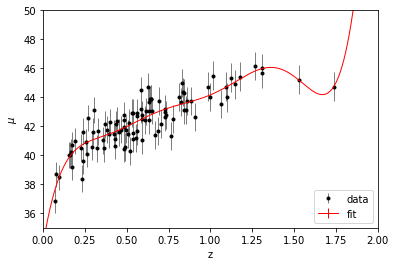

In [6]:
z_grid = np.linspace(0,2,1000)
plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.errorbar(z_grid, mu_pred, dmu_pred, color='r', lw=1,label='fit')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50)

### with Kernel: Radial-basis function kernel 

In [26]:
from sklearn.gaussian_process.kernels import RBF
kernel =  10.0 * kernels.RBF(1/0.5, (1/0.5, 1/0.5))
gp_rb = GaussianProcessRegressor(kernel = kernel)
gp_rb.fit( z_sample[:, np.newaxis],mu_sample)
#gp_rb.fit(kernel= kernel, z_sample[:, np.newaxis], mu_sample)
mu_pred_rb, dmu_pred_rb = gp_rb.predict(z_grid[:, np.newaxis],return_std=True)

C:\Users\LEONARDO\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 2.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


(35.0, 50.0)

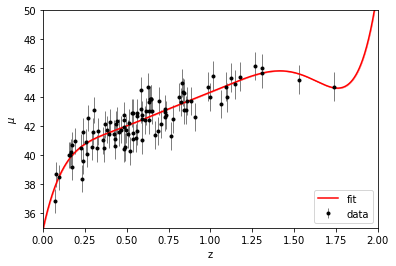

In [27]:
plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.plot(z_grid, mu_pred_rb, color='r',label='fit')
plt.fill_between(z_grid, mu_pred_rb - 1 * dmu_pred_rb, mu_pred_rb + 1 * dmu_pred_rb, color='red', alpha=0.3)
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50)